<a href="https://colab.research.google.com/github/Ntp-K/NarutoBoruto/blob/main/NarutoBoruto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
# import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing import image

import numpy as np
import os
# import PIL
# import PIL.Image
import cv2
import matplotlib.pyplot as plt

## 1. Get Data

In [2]:
!wget 'https://github.com/Ntp-K/NarutoBoruto/raw/main/NarutoBoruto.zip'

--2021-07-26 13:51:15--  https://github.com/Ntp-K/NarutoBoruto/raw/main/NarutoBoruto.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Ntp-K/NarutoBoruto/main/NarutoBoruto.zip [following]
--2021-07-26 13:51:15--  https://raw.githubusercontent.com/Ntp-K/NarutoBoruto/main/NarutoBoruto.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16383219 (16M) [application/zip]
Saving to: ‘NarutoBoruto.zip’

NarutoBoruto.zip    100%[===================>]  15.62M  --.-KB/s    in 0.1s    

2021-07-26 13:51:16 (117 MB/s) - ‘NarutoBoruto.zip’ saved [16383219/16383219]



In [3]:
!unzip '/content/NarutoBoruto.zip'

Archive:  /content/NarutoBoruto.zip
   creating: NarutoBoruto/
  inflating: NarutoBoruto/.DS_Store  
   creating: NarutoBoruto/NarutoBoruto_Train/
  inflating: NarutoBoruto/NarutoBoruto_Train/.DS_Store  
   creating: NarutoBoruto/NarutoBoruto_Train/naruto/
  inflating: NarutoBoruto/NarutoBoruto_Train/naruto/naruto00071.png  
  inflating: NarutoBoruto/NarutoBoruto_Train/naruto/naruto00065.png  
  inflating: NarutoBoruto/NarutoBoruto_Train/naruto/naruto00059.png  
  inflating: NarutoBoruto/NarutoBoruto_Train/naruto/naruto00058.png  
  inflating: NarutoBoruto/NarutoBoruto_Train/naruto/naruto00064.png  
  inflating: NarutoBoruto/NarutoBoruto_Train/naruto/naruto00070.png  
  inflating: NarutoBoruto/NarutoBoruto_Train/naruto/naruto00066.png  
  inflating: NarutoBoruto/NarutoBoruto_Train/naruto/naruto00072.png  
  inflating: NarutoBoruto/NarutoBoruto_Train/naruto/naruto00099.png  
  inflating: NarutoBoruto/NarutoBoruto_Train/naruto/naruto00098.png  
  inflating: NarutoBoruto/NarutoBoruto_Trai

In [4]:
train_dir = '/content/NarutoBoruto/NarutoBoruto_Train'

In [5]:
batch_size = 10
img_height = 128
img_width = 128

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 200 files belonging to 2 classes.
Using 160 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 200 files belonging to 2 classes.
Using 40 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)


['boruto', 'naruto']


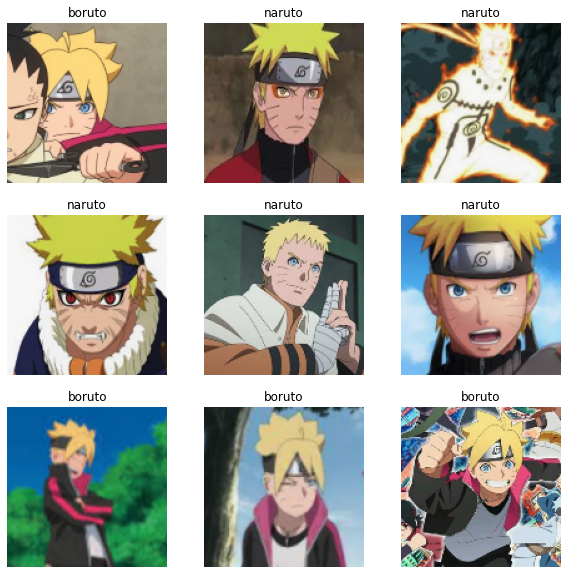

In [11]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i-1].numpy().astype("uint8"))
    plt.title(class_names[labels[i-1]])
    plt.axis("off")

## 2. Preprocessing

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 128, 128, 3)
(10,)


In [13]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

## 3. Model Construction

In [35]:
num_classes = 2

In [34]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [39]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 128, 128, 3)       0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 64)       

## 4. Training

In [53]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
16/16 [==============================] - 1s 28ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.2256 - val_accuracy: 0.9000
Epoch 2/30
16/16 [==============================] - 1s 28ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.1683 - val_accuracy: 0.9250
Epoch 3/30
16/16 [==============================] - 1s 28ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.1806 - val_accuracy: 0.9500
Epoch 4/30
16/16 [==============================] - 1s 27ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2567 - val_accuracy: 0.9250
Epoch 5/30
16/16 [==============================] - 1s 27ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.2443 - val_accuracy: 0.9250
Epoch 6/30
16/16 [==============================] - 1s 31ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.2282 - val_accuracy: 0.9250
Epoch 7/30
16/16 [==============================] - 1s 29ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.1849 - val_accuracy: 0.9500
Epoch 8/30
16

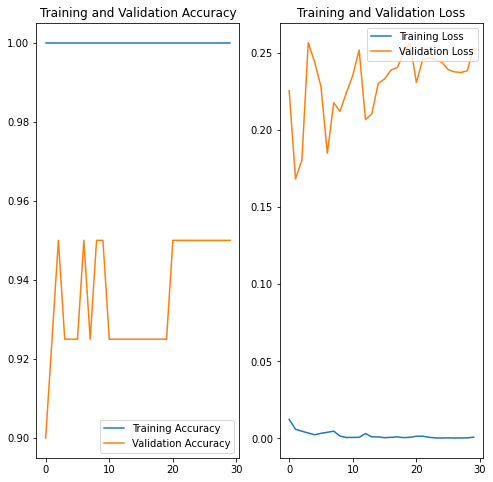

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
results = []
img_paths = []
predict_dir = '/content/NarutoBoruto/NarutoBoruto_Predict'

for filename in os.listdir(predict_dir):
    if filename.endswith("png"): 
        img_path = os.path.join(predict_dir, filename)
        img_paths.append(img_path) 
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img.resize(128,128,3)
        img = np.expand_dims(img, axis=0)
        result = model.predict(img)
        results.append(result[0])

results

[array([-6.6295047,  5.8415103], dtype=float32),
 array([-1.2214756,  2.430166 ], dtype=float32),
 array([-3.2927501,  5.0275035], dtype=float32),
 array([-0.69815   ,  0.24978724], dtype=float32),
 array([-3.1171348,  3.7892823], dtype=float32),
 array([ 2.4549088, -1.8545218], dtype=float32),
 array([-3.3473313,  4.5251184], dtype=float32),
 array([-4.471173,  4.78164 ], dtype=float32),
 array([-3.7543206,  2.891313 ], dtype=float32),
 array([-12.329772 ,   6.2295156], dtype=float32)]

IndexError: ignored

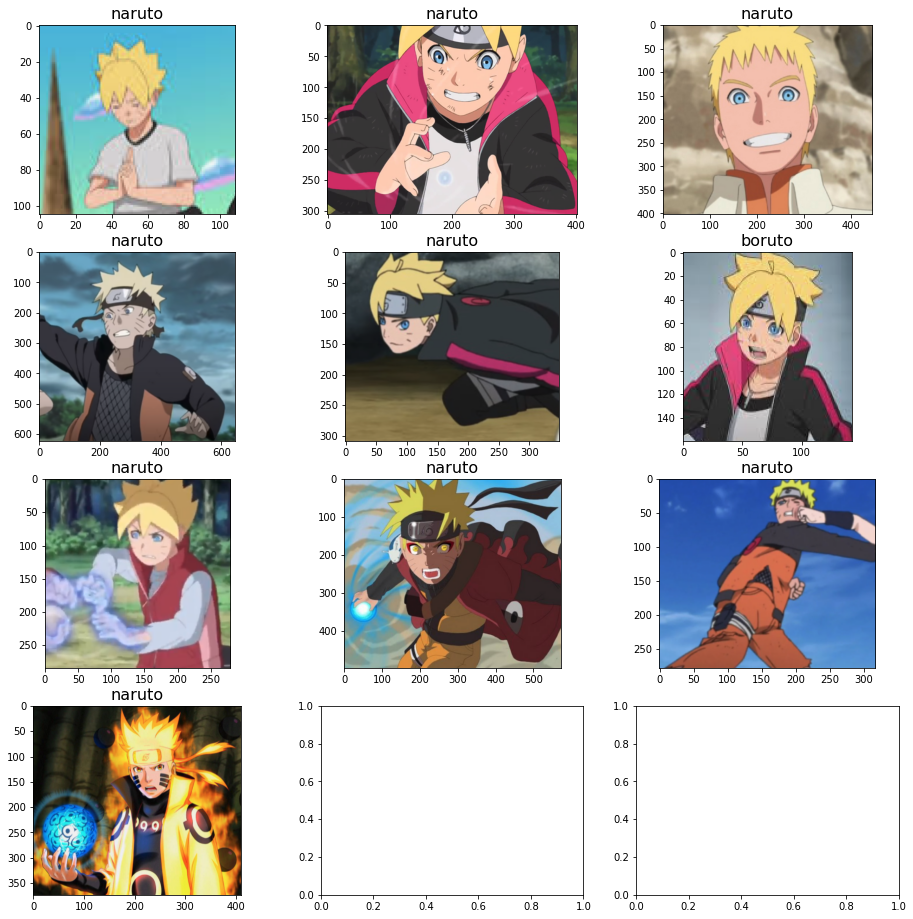

In [49]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=[16,16])

for i, axi in enumerate(ax.flat):
  img = cv2.imread(img_paths[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  axi.imshow(img)

  if results[i][0] > results[i][1]:
    axi.set_title('boruto',fontsize=16)
  else:
    axi.set_title('naruto',fontsize=16)

# fig.tight_layout(pad=8.0)
plt.show()


In [ ]:
def predict(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)

  img.resize(128,128,3)
  img = np.expand_dims(img, axis=0)

  classes = model.predict(img)
  print(classes)
  if classes[0][0]>0.5:
    print('boruto')
  else:
    print('naruto')

[[0.26137763 4.205213  ]]
naruto


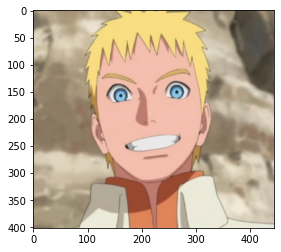

In [ ]:
predict('/content/predict/naruto01.png')